# Parameterized Learning

The k-NN classifier – a machine learning model so simple
that it doesn’t do any actual “learning” at all. We simply have to store the training data inside
the model, and then predictions are made at test time by comparing the testing data points to
our training data.

How to learn something?

## Parameterization

parameterization is the process of defining the necessary parameters of a
given model

## Loss function

A loss function quantifies how well our predicted class labels agree with our ground-truth labels.

![loss](../asset/loss.png)

## Weights and Biases

The weight matrix, typically denoted as **W** and the bias vector **b** are called the **weights** or
parameters of our classifier that we’ll actually be optimizing. Based on the output of our scoring
function and loss function, we’ll be tweaking and fiddling with the values of the weights and biases
to increase classification accuracy.

### Bias

In effect, **a bias value allows you to shift the activation function to the left or right**, which may be critical for successful learning.

In other words this sigmoind function

![loss](../asset/without_bias.png)

can look like this

![loss](../asset/with_bias.png)

**shifts the curve to the right, which allows us to have a network that outputs 0 when x is 2.**

# Linear Classification

Let’s assume that our training dataset is denoted as **xi** where each
image has an associated class label yi . We’ll assume that

**i = 1, ..., N** and

**yi = 1, ..., K**

implying that we have **N** data points of dimensionality **D**, separated into **K** unique categories.


Given these variables, we must now define a scoring function f that maps the images to the
class label scores. One method to accomplish this scoring is via a simple linear mapping:


f(xi ,W, b) = W * xi + b **texte en gras**

Where W * xi is W dot product with xi

Here a simple ilustration of the dot product

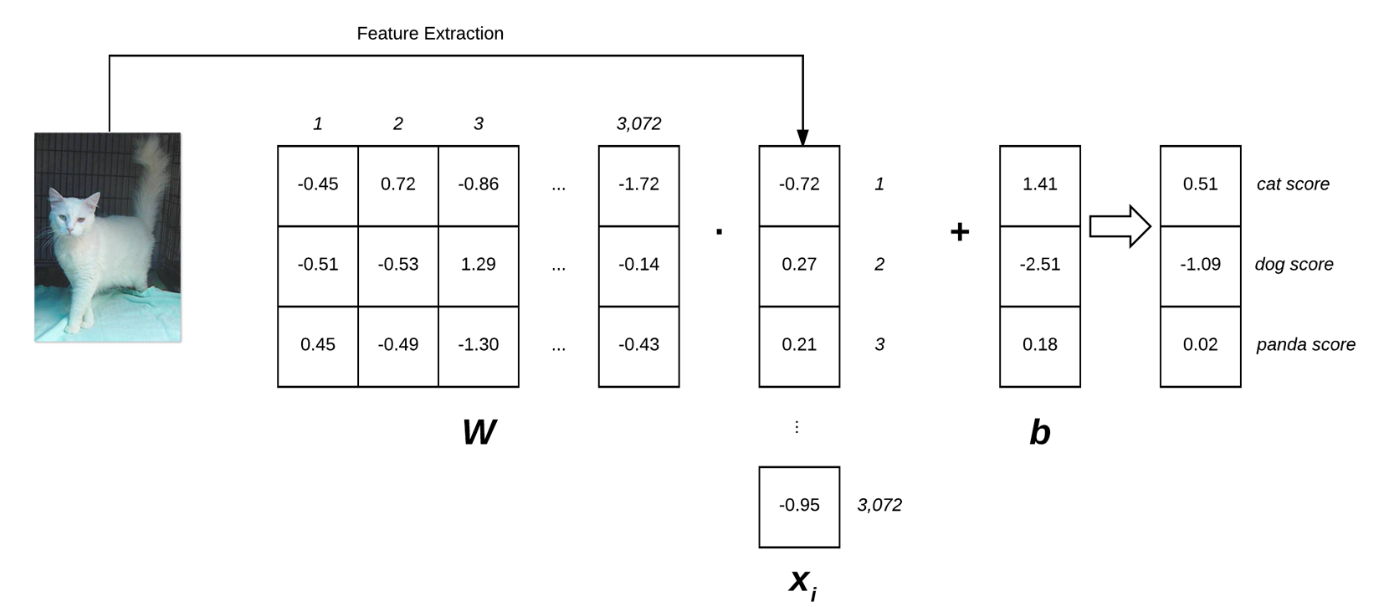

## Small demo

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


class LinearLayer:
    def __init__(self, input_dim, output_dim):
        # Initialiser la matrice de poids et le vecteur de biais avec des valeurs aléatoires
        self.weights = np.random.randn(input_dim, output_dim)
        self.bias = np.random.randn(output_dim)

    def forward(self, inputs):
        # Calculer les sorties de la couche
        return np.dot(inputs, self.weights) + self.bias

In [10]:
# initialize the class labels and set the seed of the pseudorandom
# number generator so we can reproduce our results
labels = ["dog", "cat", "panda"]
np.random.seed(1)

image_size = 32
# Grayscale format
color_chan = 1

layer = LinearLayer(image_size * image_size * color_chan, len(labels))

In [11]:
layer.weights

array([[ 1.62434536, -0.61175641, -0.52817175],
       [-1.07296862,  0.86540763, -2.3015387 ],
       [ 1.74481176, -0.7612069 ,  0.3190391 ],
       ...,
       [ 0.62143464,  0.71025428,  0.58493273],
       [ 0.5687548 ,  0.54902271, -0.30243146],
       [ 1.20731703,  1.37766662,  0.63628393]])

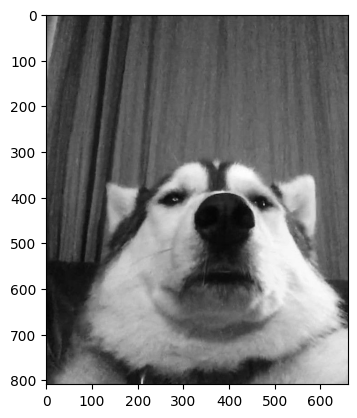

(1024,)


In [12]:
# load our example image, resize it, and then flatten it into our
# "feature vector" representation
orig = cv2.imread("../asset/old_dog.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(orig, cmap='gray')
plt.show()
x = cv2.resize(orig, (32, 32)).flatten()
print(x.shape)

In [15]:
# compute the output scores by taking the dot product between the
# weight matrix and image pixels, followed by adding in the bias
scores = layer.forward(x)
# loop over the scores + labels and display them
for (label, score) in zip(labels, scores):
    print("[INFO] {}: {:.2f}".format(label, score))

[INFO] dog: 2261.53
[INFO] cat: 2585.79
[INFO] panda: 1773.50


# Gradient Descent in 5min

![gradiant](../asset/gradiant.png)

* In left we got Bob the robot
* Bob job to navigate our loss landscape and
descend to the bottom of the basin.
* But Bob only has one sensor his loss function L

But Bob only has one sensor, this sensor
allows him to take his parameters **W** and **b** and then compute a loss function **L**

But he has absolutely no idea in which **direction** he should take a step to move himself closer to the bottom of the basin.

**What is the solution ?**

**The answer is to apply gradient descent.** All Chad needs to do is follow
the slope of the **gradient** **W** . We can compute the gradient **W** across all dimension


So in maths, the **slope** is the **derivative**

![gradiant](../asset/slope.png)

## Pseudocode for Gradient Descent


In [ ]:
while True:
    Wgradient = evaluate_gradient(loss, data, W)
    W += -alpha * Wgradient

The **evaluate_gradient** function returns a vector that is **K-dimensional**, where **K** is the
number of dimensions in our image/feature vector. The **Wgradient** variable is the actual gradient,
where we have a gradient entry for each dimension.

-------------

We then apply gradient descent on **Line 3**. We multiply our **Wgradient** by **alpha (α)**, which
is our **learning rate**. The learning rate controls the size of our step.

* Big step will go fast but we can miss the global minimum
* Low step will be slow and yake longer to train

The goal is to found the good learning rate !



## Demo

In [35]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Creat sigmoid activation function

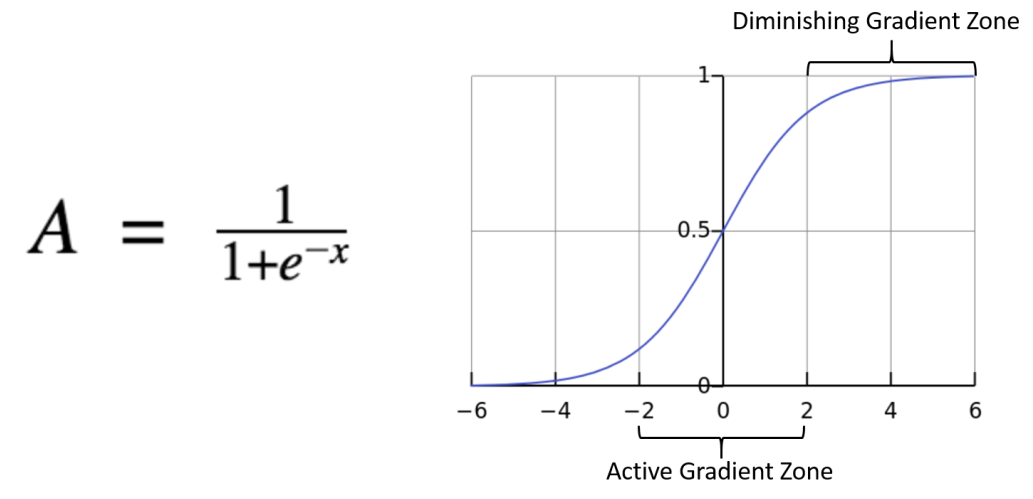

In [39]:
class LinearLayer:
    def __init__(self, input_dim, output_dim):
        # Initialize weight matrix and bias vector with random values
        self.weights = np.random.randn(input_dim, output_dim) * 0.01  # we scale the weights down
        self.bias = np.zeros(output_dim)
        self.input_dim = input_dim
        self.output_dim = output_dim

    def sigmoid(self, x):
        # implementation of the sigmoid function
        return 1 / (1 + np.exp(-x))

    def sigmoid_derivative(self, x):
        # calculation of the sigmoid derivative
        sig = self.sigmoid(x)
        return sig * (1 - sig)

    def forward(self, inputs):
        return self.sigmoid(np.dot(inputs, self.weights) + self.bias)

    def backward(self, batch_x, batch_y, preds, learning_rate):
        # now that we have our predictions, we need to determine the
        # `error`, which is the difference between our predictions
        # and the true values
        error = preds - batch_y
        loss = np.sum(error ** 2)

        # the gradient descent update is the dot product between our
        # (1) current batch and (2) the error of the sigmoid
        # derivative of our predictions
        d = self.sigmoid_derivative(preds) * error
        gradient = batch_x.T.dot(d)
        bias_gradiant = np.sum(d, axis=0)

        # update weights and biases
        self.weights = self.weights - learning_rate * gradient
        self.bias = self.bias - learning_rate * bias_gradiant

        # return loss
        return loss

### Build small dataset

In [27]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
# Generate a 2D dataset
X, y = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=22)
# Because our current implementation expects y to be 2D, we need to add an extra dimension to y
y = y[:, np.newaxis]

(1000, 2)
(1000, 1)


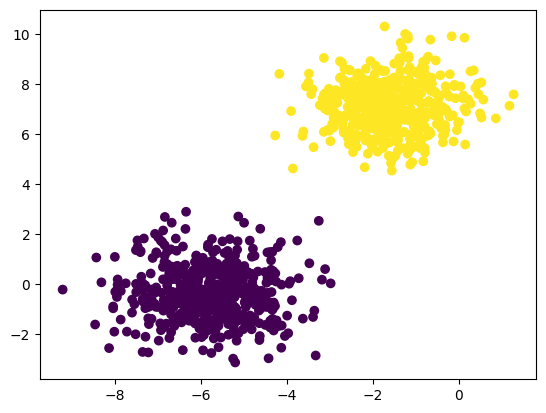

In [28]:
print(X.shape)
print(y.shape)
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], c=y[:, 0])

# Display the plot
plt.show()

In [56]:
# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
print(X_train.shape)
print(y_train.shape)

(500, 2)
(500, 1)


### Creat train loop

In [74]:
# Creat linear layer with the number of features 2, and 0 or 1 output (1 label)
layer = LinearLayer(X.shape[1], 1)

learning_rate = 0.01
num_epochs = 100

for epoch in range(num_epochs):
    # Forward pass
    preds = layer.forward(X_train)
    # Backward pass
    loss = layer.backward(X_train, y_train, preds, learning_rate)

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

Epoch 0, Loss: 112.17996956567144
Epoch 10, Loss: 0.42491377764838595
Epoch 20, Loss: 0.23989480686675488
Epoch 30, Loss: 0.15646509357641647
Epoch 40, Loss: 0.11170505228724754
Epoch 50, Loss: 0.08548397684161993
Epoch 60, Loss: 0.06919746774411321
Epoch 70, Loss: 0.058621450125520155
Epoch 80, Loss: 0.05149027863804149
Epoch 90, Loss: 0.04651132324835244


### Evaluate the model

In [75]:
# evaluate our model
preds = layer.forward(X_test)
print(classification_report(y_test, np.around(preds)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500


[A very good article on gradient descent](https://www.charlesbordet.com/fr/gradient-descent/#comment-ca-marche-)

# Classifier

Linear Support Vector Classification.

An algorithm that is part of the [Support vector Machines familly](https://scikit-learn.org/stable/modules/svm.html#support-vector-machines)

Similar to SVC with parameter kernel=’linear’ here the full [explain](https://scikit-learn.org/stable/modules/svm.html#svc)

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.linear_model import SGDClassifier

# Train dataset
x = ["j'aime les pomme vert", "les orange sont pas top", "une grosse poire", "la belle poire orange"]
# Multilabel ground truth
y = [['apple', 'green'], ['orange'], ['pear', 'green'], ['pear', 'orange']]

# Test dataset
x_test = ["pomme vert bio", "je suis orange seul", "la belle orange poire"]
y_test = [['apple', 'green'], ['orange'], ['pear', 'orange']]

# Encode labels
encoder = MultiLabelBinarizer()
y_encode = encoder.fit_transform(y)
y_test_encode = encoder.transform(y_test)

# Creat simple pipline that do tfidf
# and train Multilabel classification model with LinearSVC
SVC_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', OneVsRestClassifier(SGDClassifier(loss="log_loss",
                                              penalty="l1",
                                              learning_rate="constant",
                                              eta0=0.01),
                                n_jobs=1))
])

# train the model using X_dtm & y
SVC_pipeline.fit(x, y_encode)
# compute the testing accuracy
prediction = SVC_pipeline.predict(x_test)
print('Test accuracy is {}'.format(accuracy_score(y_test_encode, prediction)))
print(classification_report(y_test_encode, prediction))

Test accuracy is 0.6666666666666666
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       0.50      1.00      0.67         1

   micro avg       0.83      1.00      0.91         5
   macro avg       0.88      1.00      0.92         5
weighted avg       0.90      1.00      0.93         5
 samples avg       0.83      1.00      0.89         5


In [ ]:
print(prediction)
print(y_test_encode)

[[1 1 0 0]
 [0 0 1 1]
 [0 0 1 1]]
[[1 1 0 0]
 [0 0 1 0]
 [0 0 1 1]]
